In [73]:
# 삼성전자 가격 예측. 회귀분석 이용해보기
# 지도학습!
# ARIMA 시계열 데이터 분석을 통해 저가 예측해보기.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:xlabel='Date'>

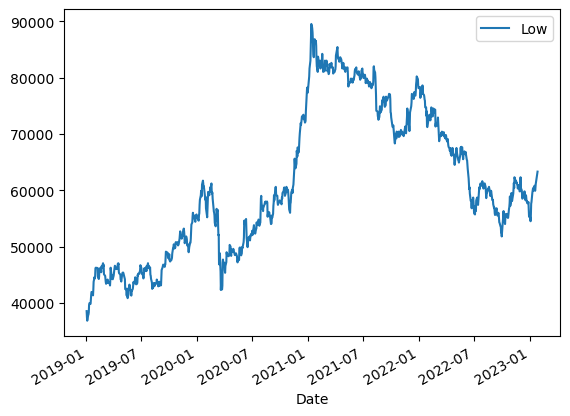

In [74]:
# 데이터 확인 절차. csv 파일 불러오고 데이터 가공.
# Plot the time series and see its pattern.
stock = pd.read_csv('Samsung Electronics Stock Price.csv')
# 해당 csv 파일에서 쓰지 않을 나머지 열 제거.
stock = stock.drop(['Open', 'High', 'Close', 'Adj Close', 'Volume'], axis=1)
# 날짜 인덱스화 하고 오름차순으로 정렬
stock['Date']=pd.to_datetime(stock['Date'])
stock.set_index('Date', inplace=True)
stock.plot()

In [75]:
# train data, test data 분리
# 2023년 1월 기준으로 분리. 해당 csv 파일에는 1월 이후로 17개의 데이터 존재.
stock_train = stock[:-17].copy()
stock_test = stock[-17:].copy()

In [76]:
# ARIMA모델의 p, d, q값 알아보기.
# 일단 d값을 알아보기 위해 차분해보기.
# 차분 후 발생하는 결측값에 대비, dropna 사용.
# 차분 후 p_value 확인을 위해 adfuller 사용.
stock_d0 = stock_train['Low']
stock_adf = adfuller(stock_d0.dropna())
print("p-value:{}".format(stock_adf[1]))

p-value:0.44659428306603693


In [77]:
# 1차 차분 후 p-value 살펴보기
stock_diff = stock_d0.diff().dropna()
stock_adf1 = adfuller(stock_diff)
print("p-value:{}".format(stock_adf1[1]))

p-value:2.8637044014739045e-16


c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


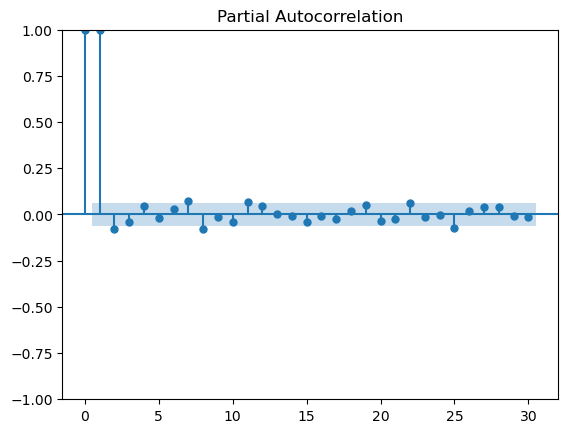

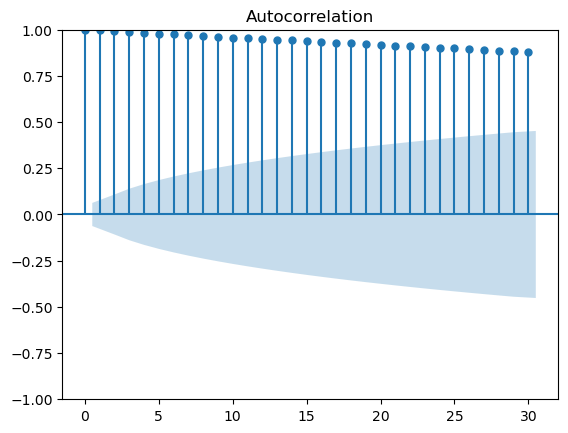

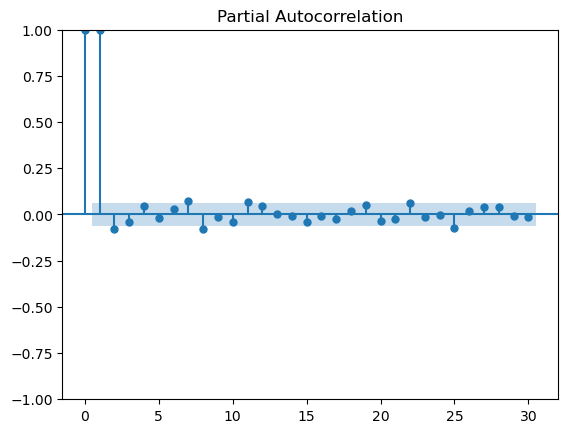

In [57]:
# 1차 차분 후 p-value 값이 급격히 감소. -> d=1.
# 원래 데이터의 ACF, PACF 도표 확인 하여 p, q값 판단.
plot_acf(stock_d0)
plot_pacf(stock_d0)

In [86]:
# 해당 ACF, PACF를 통해 데이터가 AR성향을 띰을 확인.
# 원래 데이터의 PACF lag2 이후 급감하므로 p=1, q=1로 고려.
# p, d=1, q=1로 하여 ARIMA 모델 적용하기.
model = ARIMA(stock['Low'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8245.208
Date:                Mon, 06 Feb 2023   AIC                          16496.416
Time:                        17:24:45   BIC                          16511.145
Sample:                             0   HQIC                         16502.013
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2872      0.570      0.504      0.614      -0.830       1.404
ma.L1         -0.2514      0.575     -0.438      0.662      -1.378       0.875
sigma2      8.201e+05      2e+04     41.102      0.0

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [88]:
# p > abs(z)값이 0.5를 넘어가므로 p, q값 2로 조정 후 모델 다시 설정.
model = ARIMA(stock['Low'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8241.716
Date:                Mon, 06 Feb 2023   AIC                          16493.432
Time:                        17:25:47   BIC                          16517.980
Sample:                             0   HQIC                         16502.761
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5874      0.022    -71.349      0.000      -1.631      -1.544
ar.L2         -0.9539      0.022    -43.137      0.000      -0.997      -0.911
ma.L1          1.5972      0.018     87.308      0.0

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

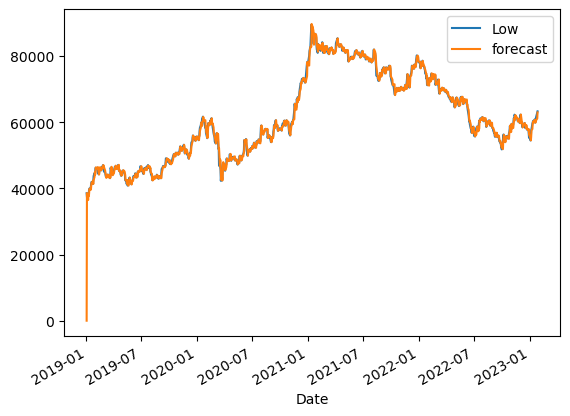

In [90]:
# 모델 설정이 완료되었으므로 예측값과 실제값 비교해보기
stock['forecast']=model_fit.predict()
stock[['Low', 'forecast']].plot()